## Lab1
- Paola Contreras: 20213
- Paola de Leon:   20361
- Diego Cordova:   20212

In [ ]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [88]:
class Bandit:
    def __init__(self, arms=10):
        self.prob_recompenza = np.random.rand(arms)

    def pull(self, arms):
        if np.random.rand() < self.prob_recompenza[arms]:
            return 1 
        else:
            return 0 

In [89]:
class Agente:
    def __init__(self, arms=10, epsilon=0.01):
        self.arms = arms
        self.epsilon = epsilon
        self.recompenza = np.zeros(arms) # matriz de recompenzas 
        self.conteoArms = np.zeros(arms) # matriz para el conteo de veces que se ha extraido cada barzo

    def selectArm(self):
        if np.random.rand() < self.epsilon: # explore (acción greedy)
            accion = np.random.randint(self.arms)
            return accion
        else: # exploit ( acción ε-greedy)
            accion = np.argmax(self.recompenza)
            return accion

    def updateEstimate(self,recompensa,arms=10):
        self.conteoArms[arms] += 1
        self.recompenza[arms] += (recompensa - self.recompenza[arms]) / self.conteoArms[arms]

In [90]:
# SIMULACIÓN 
iteraciones = 1000
recompensa_total = 0
bandit = Bandit()
agente = Agente(epsilon=0.1)
history_acc_reward = []

for _ in range(iteraciones):
    arm = agente.selectArm()
    reward = bandit.pull(arm)
    agente.updateEstimate(reward, arm)
    recompensa_total += reward
    history_acc_reward.append(recompensa_total)

print(f'La recompensa acumulada para {iteraciones} iteraciones es de {recompensa_total}')

La recompensa acumulada para 1000 iteraciones es de 734


In [91]:
for index, n in enumerate(history_acc_reward):
    if n == 0:
        print('xd', index)

xd 0


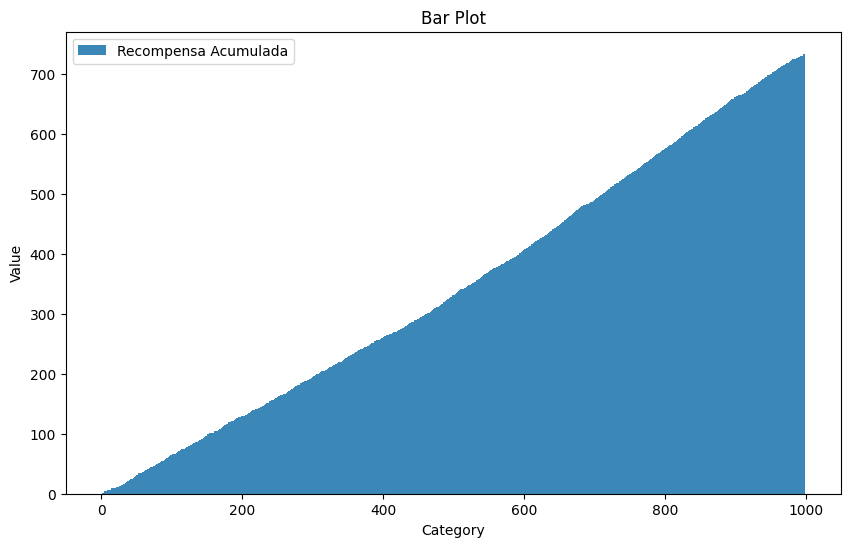

In [92]:
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(len(history_acc_reward))], history_acc_reward, color='#3b88b8', label='Recompensa Acumulada', width=1)
plt.title('Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend()
plt.show()

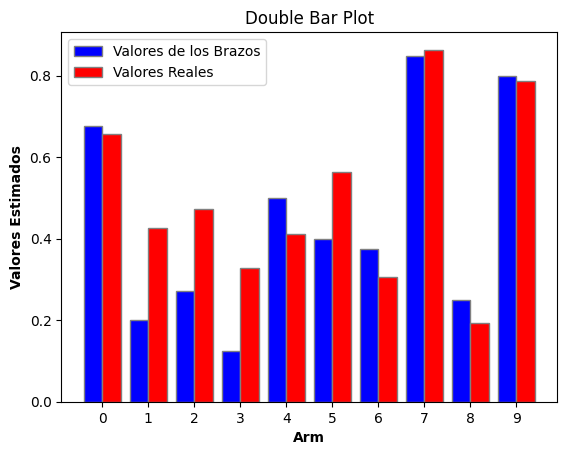

In [93]:
arms = agente.recompenza
real = bandit.prob_recompenza

n = len(arms)
r1 = np.arange(n)
r2 = [x + 0.4 for x in r1]

# Plot the bars
plt.bar(r1, arms, color='b', width=0.4, edgecolor='grey', label='Valores de los Brazos')
plt.bar(r2, real, color='r', width=0.4, edgecolor='grey', label='Valores Reales')

# Add labels
plt.xlabel('Arm', fontweight='bold')
plt.ylabel('Valores Estimados', fontweight='bold')
plt.title('Double Bar Plot')
plt.xticks([r + 0.4/2 for r in range(n)], list(range(len(arms))))

# Add legend
plt.legend()

# Show the plot
plt.show()